In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
listings = pd.read_csv("Summary_information_listings.csv")

In [3]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3943387,Cozy City Island Room/Private Bath,20433973,Julia,Bronx,City Island,40.839396,-73.781437,Private room,65,1,15,2016-06-10,0.75,1,345
1,6627449,Large 1 BDRM in Great location,13886510,Arlene,Bronx,City Island,40.849775,-73.786609,Entire home/apt,125,3,10,2016-06-25,0.82,1,336
2,11675715,Cozy 1 BR Basement Apartment,56714504,Josue,Bronx,City Island,40.850376,-73.784681,Entire home/apt,79,1,16,2016-06-12,4.57,1,305
3,1886820,Quaint City Island Community.,9815788,Steve,Bronx,City Island,40.841144,-73.783052,Entire home/apt,300,7,0,NaN,NaN,1,206
4,5557381,Quaint City Island Home,28811542,Phoebe,Bronx,City Island,40.850024,-73.789328,Private room,59,1,59,2016-06-29,4.36,1,293


In [4]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
area = pd.read_csv("neighbourhoods.csv")
#area

In [20]:
lists = listings['neighbourhood'].value_counts().head(15)

In [7]:
listings['room_type'].value_counts()

Entire home/apt    19994
Private room       17589
Shared room         1227
Name: room_type, dtype: int64

In [8]:
room = listings[listings['room_type']!='Entire home/apt']
apt = listings[listings['room_type']=='Entire home/apt']

In [12]:
room['neighbourhood'].value_counts().head(10)

Williamsburg          1876
Bedford-Stuyvesant    1489
Harlem                1439
Bushwick              1300
East Village           769
Crown Heights          712
Upper West Side        702
Hell's Kitchen         629
Washington Heights     569
East Harlem            555
Name: neighbourhood, dtype: int64

In [13]:
apt['neighbourhood'].value_counts().head(10)

Williamsburg          1579
East Village          1208
Upper West Side       1202
Bedford-Stuyvesant    1057
Upper East Side       1015
Harlem                 934
Hell's Kitchen         866
Chelsea                816
West Village           669
Midtown                663
Name: neighbourhood, dtype: int64

In [14]:
plt.style.use("fivethirtyeight")

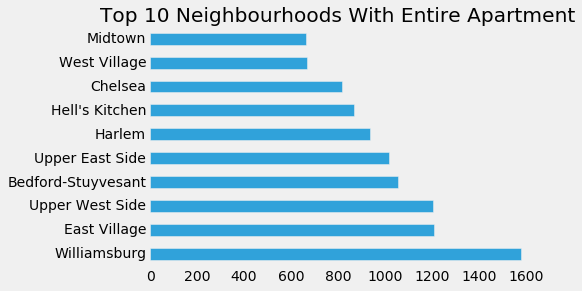

In [15]:
fig, ax = plt.subplots()

ax.set_title("Top 10 Neighbourhoods With Entire Apartment")

ax.grid(linestyle="")
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
which ='major',
top = 'off',
left = 'off',
right = 'off',
bottom = 'off',
labeltop='off',
labelbottom='on')

apt['neighbourhood'].value_counts().head(10).plot(kind='barh')

#plt.savefig("neibourhood-apt.pdf",transparent=True)

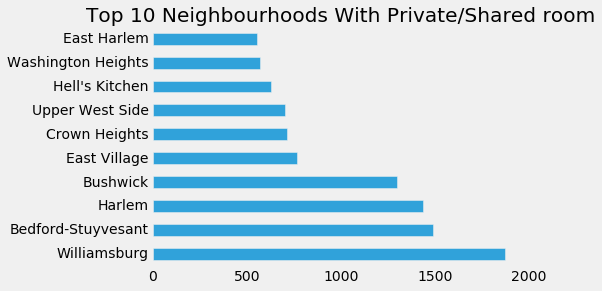

In [16]:
fig, ax = plt.subplots()

ax.set_title("Top 10 Neighbourhoods With Private/Shared room")

ax.grid(linestyle="")
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
which ='major',
top = 'off',
left = 'off',
right = 'off',
bottom = 'off',
labeltop='off',
labelbottom='on')

room['neighbourhood'].value_counts().head(10).plot(kind='barh')

#plt.savefig("neibourhood-room.pdf",transparent=True)

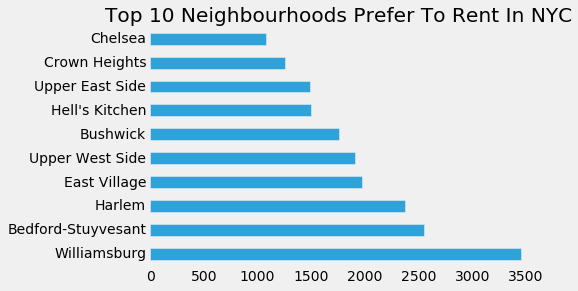

In [17]:
fig, ax = plt.subplots()

ax.set_title("Top 10 Neighbourhoods Prefer To Rent In NYC")

ax.grid(linestyle="")
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
which ='major',
top = 'off',
left = 'off',
right = 'off',
bottom = 'off',
labeltop='off',
labelbottom='on')

listings['neighbourhood'].value_counts().head(10).plot(kind='barh')

#plt.savefig("neibourhood-top.pdf",transparent=True)

In [35]:
rooms = room['neighbourhood'].value_counts().head(20).reset_index()
room_data = pd.DataFrame(rooms)
room_data.columns = ['name','room_number']
#room_data
#df.columns = ['name', 'height', 'age', 'siblings']

In [33]:
apts = apt['neighbourhood'].value_counts().head(20).reset_index()
apt_data = pd.DataFrame(apts)
apt_data.columns = ['name', 'apt_number']
#apt_data

In [34]:
#lists = listings['neighbourhood'].value_counts().head(15)
list_data = lists.reset_index()
list_data.columns = ['name','total']
#list_data

In [30]:
data1 = pd.merge(list_data, room_data, on='name')

In [55]:
data2 = pd.merge(data1, apt_data, on='name')

In [56]:
data2 = data2.head(10).sort_values(['total'])

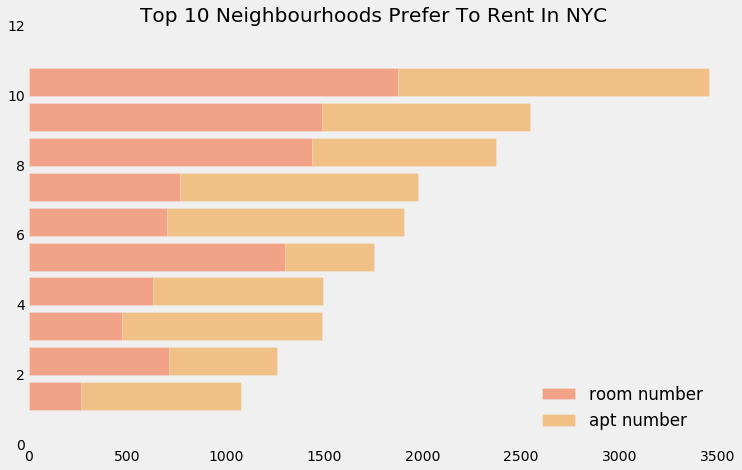

In [63]:
# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(11,7))

# positions of the left bar-boundaries
barh_l = [i+1 for i in range(len(data2['total']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(barh_width/2) for i in barh_l] 

# Create a bar plot, in position bar_1
ax1.barh(barh_l, 
        # using the pre_score data
        data2['room_number'], 
        # set the width
        # with the label 
        label='room number', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F4561D')

# Create a bar plot, in position bar_1
ax1.barh(barh_l, 
        # using the mid_score data
        data2['apt_number'], 
        # with pre_score on the bottom
        left=data2['room_number'], 
        # with the label
        label='apt number', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F1911E')


# set the x ticks with names
#plt.xticks(tick_pos, data2['name'])

plt.legend(loc='lower right')


ax1.set_title("Top 10 Neighbourhoods Prefer To Rent In NYC")

ax1.grid(linestyle="")
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

plt.tick_params(
which ='major',
top = 'off',
left = 'off',
right = 'off',
bottom = 'off',
labeltop='off',
labelbottom='on')

plt.savefig("top10.pdf",transparent=True)